In [1]:
from sklearn.datasets import load_digits

loading the data

In [4]:
digits = load_digits()

In [5]:
X = digits.data
y = digits.target

In [10]:
X.shape

(1797, 64)

In [24]:
y.shape

(1797,)

In [25]:
y[0]

0

In [15]:
X[0].shape

(64,)

In [6]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

let's plot an element of the data

In [7]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

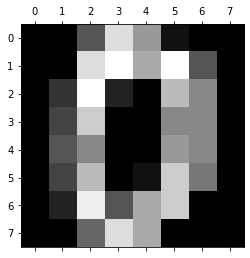

In [21]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
gb = GradientBoostingClassifier(n_estimators=20)

In [28]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
gb.estimators_[0]

array([DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x25CB62EBAE8,
                      splitter='best'),
       DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x25CB62EBAE8,
                      splitter='best'),
       DecisionTreeRegressor(ccp_alpha=0.0, criterion='fried

In [34]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot

In [43]:
tree_0 = gb.estimators_[0][0]

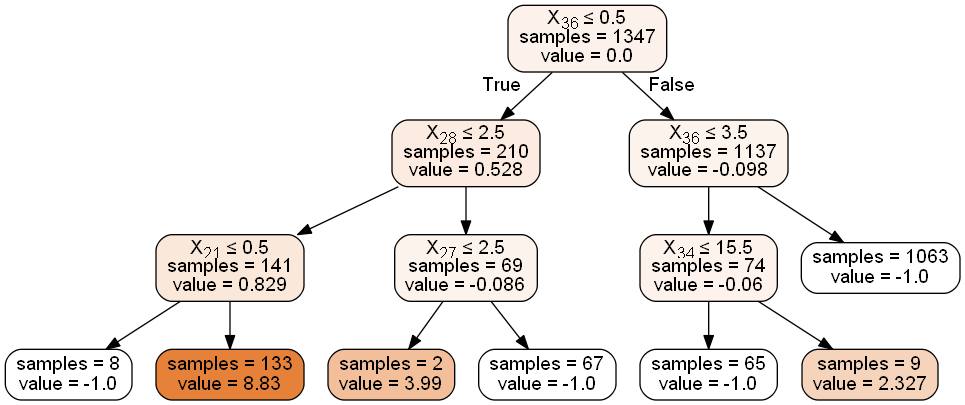

In [44]:
# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    tree_0,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [45]:
from xgboost import XGBClassifier
from xgboost import plot_tree

In [67]:
xgb = XGBClassifier()

In [68]:
xgb.fit(X, y)

D:\Anaconda\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:09:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

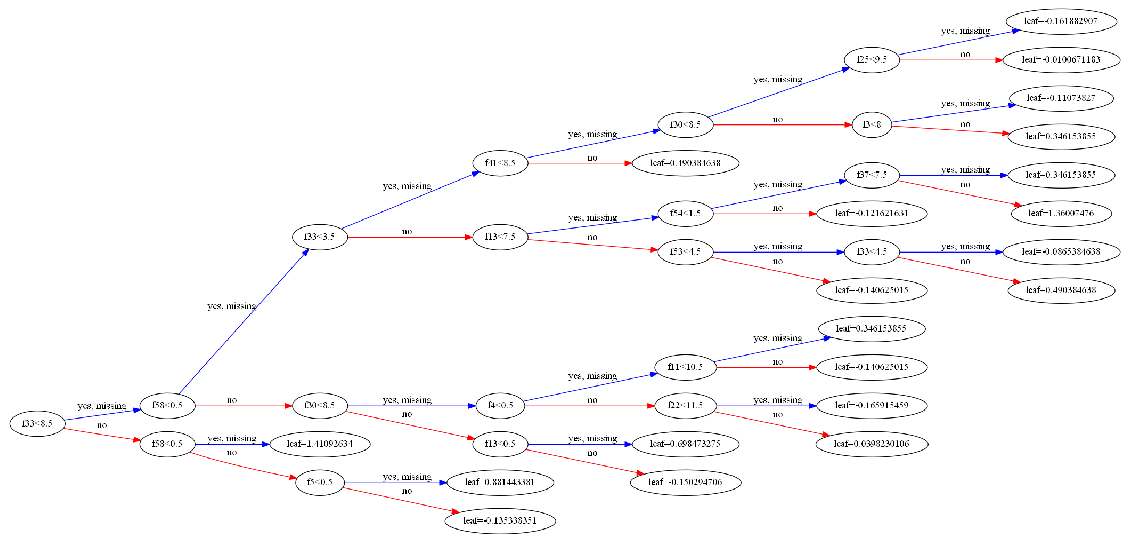

In [61]:
# plot single tree
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(xgb, num_trees=4, ax=ax, rankdir='LR')
plt.show()

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [63]:
prediction_1 = gb.predict(X_test)
prediction_2 = xgb.predict(X_test)

In [65]:
gb_accuracy = accuracy_score(y_test, prediction_1)
gb_accuracy

0.9044444444444445

In [69]:
xgb_accuracy = accuracy_score(y_test, prediction_2)
xgb_accuracy

1.0

In [70]:
cm_1 = confusion_matrix(y_test, prediction_1)
cm_1

array([[39,  0,  0,  0,  1,  1,  1,  0,  1,  0],
       [ 0, 34,  0,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 45,  0,  0,  0,  3,  0,  1,  0],
       [ 0,  1,  2, 51,  0,  1,  0,  0,  2,  3],
       [ 0,  1,  0,  0, 50,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0, 42,  2,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  2,  1],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 34,  2],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  3, 34]], dtype=int64)

In [71]:
cm_2 = confusion_matrix(y_test, prediction_2)
cm_2

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 60,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40]], dtype=int64)